imports

In [2]:
from ultralytics import YOLO

import os
from PIL import Image

import torch
from torchvision import transforms

import matplotlib.pyplot as plt

instantiating gpu use

In [2]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(f'device: {device}')

device: cuda


inspecting the dataset

In [3]:
TRAIN_IMG_DIR = 'data/images/train'
VAL_IMG_DIR   = 'data/images/val'
TEST_IMG_DIR = 'data/images/test'

In [4]:
print(f"total training fish images: {len(os.listdir(TRAIN_IMG_DIR))}")
print(f"total validation fish images: {len(os.listdir(VAL_IMG_DIR))}")
print(f"total testing fish images: {len(os.listdir(TEST_IMG_DIR))}")

total training fish images: 459
total validation fish images: 60
total testing fish images: 58


In [4]:
TRAIN_LABELS_DIR = 'data/labels/train'
VAL_LABELS_DIR   = 'data/labels/val' 
TEST_LABELS_DIR = 'data/labels/test'

In [5]:
print(f"total training fish labels: {len(os.listdir(TRAIN_LABELS_DIR))}")
print(f"total validation fish labels: {len(os.listdir(VAL_LABELS_DIR))}")
print(f"total testing fish labels: {len(os.listdir(TEST_LABELS_DIR))}")

total training fish labels: 459
total validation fish labels: 60
total testing fish labels: 58


The actual images

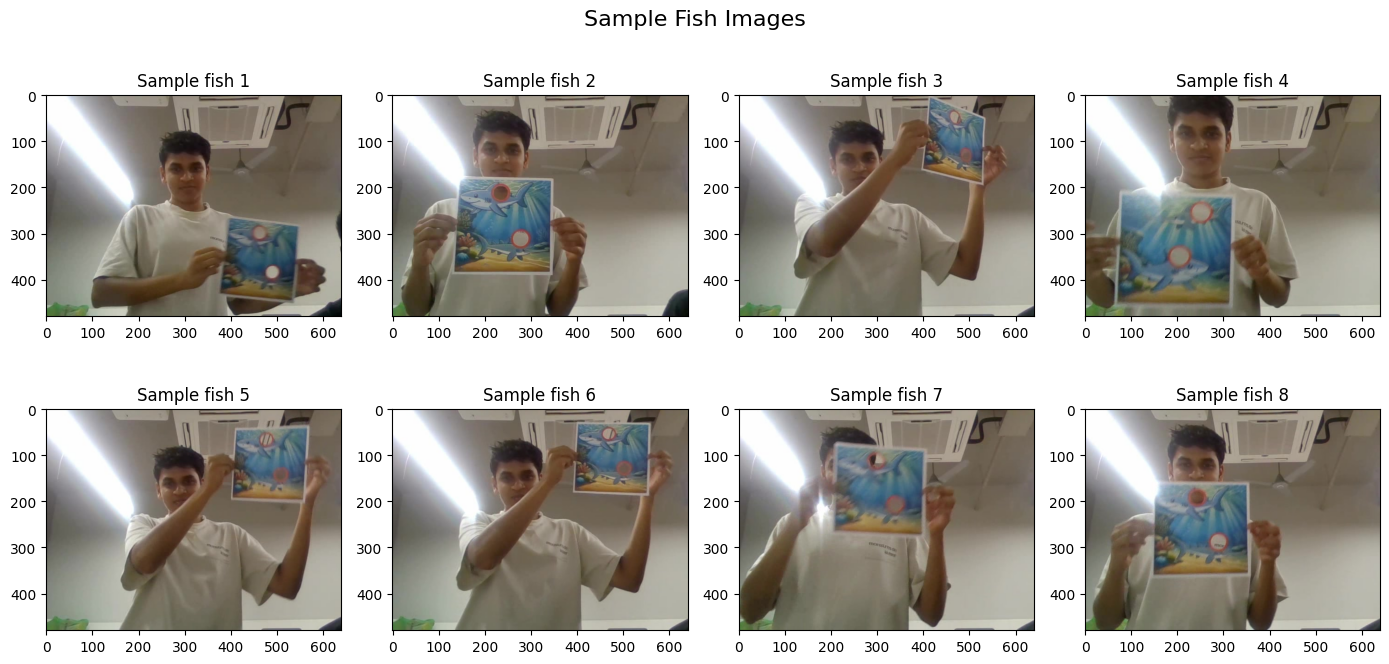

In [12]:
fish_images = [os.path.join(TRAIN_IMG_DIR, filename) for filename in os.listdir(TRAIN_IMG_DIR) 
                if filename.lower().endswith(('.png', '.jpg', '.jpeg'))]

fig, axes = plt.subplots(2, 4, figsize=(14, 7))
fig.suptitle('Sample Fish Images', fontsize=16)

for i, fish_image in enumerate(fish_images[:8]):
    img = Image.open(fish_image)
    row = i // 4  
    col = i % 4   
    
    axes[row, col].imshow(img)
    axes[row, col].set_title(f'Sample fish {i+1}')

plt.tight_layout()
plt.show()

after augmentation , creating a model

In [8]:
model = YOLO('yolov8m.pt')
model.info()

YOLOv8m summary: 169 layers, 25,902,640 parameters, 0 gradients, 79.3 GFLOPs


(169, 25902640, 0, 79.3204224)

In [9]:
model.train(
    # SETUP
    data='config.yaml',
    epochs=200,            
    patience=20,           
    batch=16,               
    device=0,
    freeze=8,              
    optimizer='Adam',
    lr0=0.0003,            
    lrf=0.01,
    weight_decay=0.0005,
    warmup_epochs=5,       
    warmup_bias_lr=0.1,
    dropout=0.2,           
    
    # DATA AUGMENTATION 
    degrees=45.0,          
    scale=0.25,            
    translate=0.08,        
    perspective=0.0003,    
    shear=2.0,             
    fliplr=0.5,            
    hsv_h=0.02,            
    hsv_s=0.7,             
    hsv_v=0.4,             
    mixup=0.1,             
    copy_paste=0.2,                     
)

Ultralytics 8.3.177 🚀 Python-3.13.5 torch-2.8.0+cu128 CUDA:0 (NVIDIA GeForce RTX 4060 Laptop GPU, 7797MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, conf=None, copy_paste=0.2, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=config.yaml, degrees=45.0, deterministic=True, device=0, dfl=1.5, dnn=False, dropout=0.2, dynamic=False, embed=None, epochs=200, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=8, half=False, hsv_h=0.02, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.0003, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.1, mode=train, model=yolov8m.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=train, nbs=64, nms=False, opset=None, optimize=False, optimizer=Adam, overlap_mask=True, patience=20, perspective=0.0003, plots=True, pose=12.0, pret

AMP: checks passed ✅
train: Fast image access ✅ (ping: 0.0±0.0 ms, read: 61.4±43.0 MB/s, size: 26.7 KB)


train: Scanning /home/pranav/Projects/Final_AUV/torpedo_launcher/bounding_boxes/data/labels/train... 459 images, 0 backgrounds, 0 corrupt: 100%|██████████| 459/459 [00:00<00:00, 3867.09it/s]

train: New cache created: /home/pranav/Projects/Final_AUV/torpedo_launcher/bounding_boxes/data/labels/train.cache


val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 65.9±38.3 MB/s, size: 28.3 KB)


val: Scanning /home/pranav/Projects/Final_AUV/torpedo_launcher/bounding_boxes/data/labels/val... 60 images, 0 backgrounds, 0 corrupt: 100%|██████████| 60/60 [00:00<00:00, 1841.37it/s]

val: New cache created: /home/pranav/Projects/Final_AUV/torpedo_launcher/bounding_boxes/data/labels/val.cache


Plotting labels to runs/detect/train/labels.jpg... 
optimizer: Adam(lr=0.0003, momentum=0.937) with parameter groups 77 weight(decay=0.0), 84 weight(decay=0.0005), 83 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 8 dataloader workers
Logging results to runs/detect/train
Starting training for 200 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      1/200      2.83G      1.834      1.844      1.886         93        640: 100%|██████████| 29/29 [00:09<00:00,  3.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.02it/s]

                   all         60        240       0.76      0.531      0.729      0.359



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      2/200      3.37G      1.269     0.8657      1.457         77        640: 100%|██████████| 29/29 [00:08<00:00,  3.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.58it/s]

                   all         60        240      0.954       0.96      0.991      0.465



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      3/200      3.42G      1.168     0.6924      1.374         86        640: 100%|██████████| 29/29 [00:08<00:00,  3.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.62it/s]

                   all         60        240      0.804      0.971      0.939      0.664



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      4/200      3.47G      1.084     0.6177      1.318        103        640: 100%|██████████| 29/29 [00:08<00:00,  3.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.61it/s]

                   all         60        240      0.996          1      0.995      0.706



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      5/200      3.52G      1.026     0.5973      1.283         73        640: 100%|██████████| 29/29 [00:08<00:00,  3.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.60it/s]

                   all         60        240      0.995          1      0.995      0.696



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      6/200      3.57G      1.052     0.5974      1.299         95        640: 100%|██████████| 29/29 [00:07<00:00,  3.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.99it/s]

                   all         60        240      0.993          1      0.995      0.735



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      7/200      3.62G      1.022     0.5512      1.275         85        640: 100%|██████████| 29/29 [00:07<00:00,  3.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.07it/s]

                   all         60        240      0.995          1      0.995        0.6



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      8/200      3.67G      1.028     0.5553       1.28         55        640: 100%|██████████| 29/29 [00:07<00:00,  3.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.86it/s]

                   all         60        240      0.996      0.997      0.995       0.66



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      9/200      3.72G     0.9909     0.5296      1.251         67        640: 100%|██████████| 29/29 [00:07<00:00,  3.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.03it/s]

                   all         60        240      0.989          1      0.995      0.636



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     10/200      3.84G      1.011     0.5372      1.271         77        640: 100%|██████████| 29/29 [00:07<00:00,  3.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.04it/s]

                   all         60        240      0.981      0.991      0.995      0.748



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     11/200      2.95G     0.9827     0.5304      1.261         86        640: 100%|██████████| 29/29 [00:07<00:00,  3.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.05it/s]

                   all         60        240      0.995          1      0.995      0.659



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     12/200       3.2G     0.9686     0.5165      1.238         72        640: 100%|██████████| 29/29 [00:07<00:00,  3.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.03it/s]

                   all         60        240      0.998          1      0.995      0.684



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     13/200       3.2G     0.9892     0.4998      1.241         71        640: 100%|██████████| 29/29 [00:08<00:00,  3.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.62it/s]

                   all         60        240      0.997          1      0.995      0.648



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     14/200      3.25G     0.9101     0.4631      1.189         75        640: 100%|██████████| 29/29 [00:08<00:00,  3.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.57it/s]

                   all         60        240      0.993          1      0.995      0.748



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     15/200      3.34G     0.9399     0.4846      1.216         66        640: 100%|██████████| 29/29 [00:08<00:00,  3.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.58it/s]

                   all         60        240      0.994      0.995      0.995      0.743



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     16/200      3.51G      0.919     0.4682      1.191         83        640: 100%|██████████| 29/29 [00:08<00:00,  3.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.59it/s]

                   all         60        240       0.99      0.999      0.995      0.745



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     17/200       3.6G     0.9074     0.4655      1.195         76        640: 100%|██████████| 29/29 [00:08<00:00,  3.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.56it/s]

                   all         60        240      0.996          1      0.995      0.738



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     18/200      3.72G      0.913     0.4591      1.182         90        640: 100%|██████████| 29/29 [00:08<00:00,  3.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.59it/s]

                   all         60        240      0.994      0.999      0.995      0.718



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     19/200      3.83G      0.884     0.4445       1.18         70        640: 100%|██████████| 29/29 [00:08<00:00,  3.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.60it/s]

                   all         60        240      0.997          1      0.995       0.71



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     20/200         3G     0.8862     0.4501      1.186         94        640: 100%|██████████| 29/29 [00:08<00:00,  3.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.57it/s]

                   all         60        240      0.997          1      0.995      0.704



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     21/200         3G      0.869     0.4428      1.175         69        640: 100%|██████████| 29/29 [00:08<00:00,  3.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.58it/s]

                   all         60        240      0.993      0.994      0.995      0.687



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     22/200      3.09G     0.9162     0.4601      1.197         93        640: 100%|██████████| 29/29 [00:08<00:00,  3.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.53it/s]

                   all         60        240      0.996          1      0.995       0.76



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     23/200      3.23G      0.884     0.4532       1.19         72        640: 100%|██████████| 29/29 [00:08<00:00,  3.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.58it/s]

                   all         60        240      0.997          1      0.995      0.722



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     24/200      3.36G     0.8862     0.4377      1.173         76        640: 100%|██████████| 29/29 [00:08<00:00,  3.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.60it/s]

                   all         60        240      0.998          1      0.995      0.748



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     25/200      3.53G     0.8632     0.4212      1.161         87        640: 100%|██████████| 29/29 [00:08<00:00,  3.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.60it/s]

                   all         60        240      0.997          1      0.995      0.775



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     26/200      3.58G      0.881     0.4334      1.166         98        640: 100%|██████████| 29/29 [00:08<00:00,  3.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.58it/s]

                   all         60        240      0.995      0.998      0.995      0.756



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     27/200       3.7G     0.8632     0.4239      1.159         76        640: 100%|██████████| 29/29 [00:08<00:00,  3.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.57it/s]

                   all         60        240      0.996          1      0.995      0.736



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     28/200      3.83G     0.8552     0.4127      1.157         81        640: 100%|██████████| 29/29 [00:08<00:00,  3.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.60it/s]

                   all         60        240      0.996          1      0.995      0.767



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     29/200      3.06G     0.8758     0.4202      1.172         70        640: 100%|██████████| 29/29 [00:08<00:00,  3.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.59it/s]

                   all         60        240      0.986       0.99      0.995      0.757



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     30/200      3.06G     0.8466     0.4156      1.157         78        640: 100%|██████████| 29/29 [00:08<00:00,  3.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.58it/s]

                   all         60        240      0.997          1      0.995      0.733



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     31/200      3.08G      0.886     0.4304      1.177         87        640: 100%|██████████| 29/29 [00:08<00:00,  3.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.58it/s]

                   all         60        240      0.993          1      0.995      0.744



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     32/200      3.23G     0.8783     0.4236      1.172         66        640: 100%|██████████| 29/29 [00:08<00:00,  3.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.60it/s]

                   all         60        240      0.992          1      0.995      0.751



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     33/200      3.53G     0.8562     0.4225      1.155         76        640: 100%|██████████| 29/29 [00:08<00:00,  3.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.61it/s]

                   all         60        240      0.996          1      0.995      0.732



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     34/200      3.58G     0.8277     0.4127      1.137         82        640: 100%|██████████| 29/29 [00:08<00:00,  3.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.57it/s]

                   all         60        240      0.994          1      0.995      0.774



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     35/200      3.63G     0.8355     0.4068      1.135         94        640: 100%|██████████| 29/29 [00:08<00:00,  3.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.55it/s]

                   all         60        240      0.997          1      0.995      0.779



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     36/200      3.68G      0.852     0.4236      1.143         73        640: 100%|██████████| 29/29 [00:08<00:00,  3.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.57it/s]

                   all         60        240      0.995          1      0.995      0.749



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     37/200      3.81G     0.8374     0.4087      1.144         81        640: 100%|██████████| 29/29 [00:08<00:00,  3.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.61it/s]

                   all         60        240      0.995      0.999      0.995      0.728



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     38/200      2.94G     0.8553     0.4248      1.152         60        640: 100%|██████████| 29/29 [00:08<00:00,  3.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.56it/s]

                   all         60        240      0.992      0.997      0.995      0.769



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     39/200         3G     0.8366     0.4166       1.15         94        640: 100%|██████████| 29/29 [00:08<00:00,  3.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.58it/s]

                   all         60        240      0.998          1      0.995      0.712



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     40/200      3.17G      0.831     0.4128      1.133         71        640: 100%|██████████| 29/29 [00:08<00:00,  3.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.59it/s]

                   all         60        240      0.997          1      0.995      0.758



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     41/200      3.34G     0.8364     0.3995      1.144         81        640: 100%|██████████| 29/29 [00:08<00:00,  3.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.60it/s]

                   all         60        240      0.998          1      0.995      0.768



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     42/200      3.39G     0.8406      0.407       1.15         72        640: 100%|██████████| 29/29 [00:08<00:00,  3.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.56it/s]

                   all         60        240      0.956      0.969      0.995      0.762



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     43/200      3.48G      0.836     0.4047      1.144         83        640: 100%|██████████| 29/29 [00:08<00:00,  3.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.55it/s]

                   all         60        240      0.985      0.996      0.995      0.746



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     44/200      3.78G     0.7998     0.3866      1.122         74        640: 100%|██████████| 29/29 [00:08<00:00,  3.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.56it/s]

                   all         60        240      0.991      0.994      0.995      0.736



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     45/200      3.83G     0.7842     0.3806      1.118         65        640: 100%|██████████| 29/29 [00:08<00:00,  3.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.61it/s]

                   all         60        240       0.99      0.994      0.995      0.766



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     46/200      3.14G     0.8145     0.3871       1.12         64        640: 100%|██████████| 29/29 [00:08<00:00,  3.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.98it/s]

                   all         60        240      0.993      0.999      0.995      0.747



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     47/200      3.14G     0.8173     0.3869      1.128         78        640: 100%|██████████| 29/29 [00:07<00:00,  3.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.97it/s]

                   all         60        240      0.998          1      0.995      0.756



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     48/200      3.17G     0.7988     0.3863       1.12         85        640: 100%|██████████| 29/29 [00:07<00:00,  3.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.92it/s]

                   all         60        240      0.994          1      0.995      0.752



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     49/200      3.47G     0.8111     0.3834      1.121         80        640: 100%|██████████| 29/29 [00:08<00:00,  3.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.00it/s]

                   all         60        240      0.994      0.995      0.995      0.743



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     50/200      3.52G     0.7949     0.3867      1.109         65        640: 100%|██████████| 29/29 [00:07<00:00,  3.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.99it/s]

                   all         60        240      0.996          1      0.995      0.722



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     51/200      3.57G     0.8032     0.3943      1.119        113        640: 100%|██████████| 29/29 [00:07<00:00,  3.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.99it/s]

                   all         60        240      0.997      0.999      0.995      0.754



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     52/200      3.62G     0.7906     0.3773      1.105         62        640: 100%|██████████| 29/29 [00:07<00:00,  3.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.98it/s]

                   all         60        240      0.992          1      0.995      0.749



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     53/200       3.7G     0.7772     0.3697      1.104         65        640: 100%|██████████| 29/29 [00:07<00:00,  3.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.99it/s]

                   all         60        240      0.989      0.997      0.995      0.746



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     54/200      3.84G      0.787     0.3917      1.107         68        640: 100%|██████████| 29/29 [00:07<00:00,  3.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.02it/s]

                   all         60        240      0.978      0.972      0.995      0.764



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     55/200      2.99G     0.8053     0.3807      1.124         71        640: 100%|██████████| 29/29 [00:07<00:00,  3.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.95it/s]

                   all         60        240      0.992      0.994      0.995      0.705
EarlyStopping: Training stopped early as no improvement observed in last 20 epochs. Best results observed at epoch 35, best model saved as best.pt.
To update EarlyStopping(patience=20) pass a new patience value, i.e. `patience=300` or use `patience=0` to disable EarlyStopping.



55 epochs completed in 0.144 hours.
Optimizer stripped from runs/detect/train/weights/last.pt, 52.0MB
Optimizer stripped from runs/detect/train/weights/best.pt, 52.0MB

Validating runs/detect/train/weights/best.pt...
Ultralytics 8.3.177 🚀 Python-3.13.5 torch-2.8.0+cu128 CUDA:0 (NVIDIA GeForce RTX 4060 Laptop GPU, 7797MiB)
Model summary (fused): 92 layers, 25,841,497 parameters, 0 gradients, 78.7 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.03it/s]


                   all         60        240      0.997          1      0.995      0.779
                 shark         60         60      0.995          1      0.995      0.834
               sawfish         60         60      0.997          1      0.995       0.73
                  hole         60        120      0.999          1      0.995      0.774
Speed: 0.1ms preprocess, 6.5ms inference, 0.0ms loss, 0.6ms postprocess per image
Results saved to runs/detect/train


ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0, 1, 2])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7fb72c56f070>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,
          0.04

In [11]:
history = YOLO('runs/detect/train/weights/best.pt')

history.val(
    data = 'config.yaml',
    split = 'test',
    batch = 8,
    conf=0.5,
    iou=0.5,
    plots=True,          
    save_json=True  
)

Ultralytics 8.3.177 🚀 Python-3.13.5 torch-2.8.0+cu128 CUDA:0 (NVIDIA GeForce RTX 4060 Laptop GPU, 7797MiB)
Model summary (fused): 92 layers, 25,841,497 parameters, 0 gradients, 78.7 GFLOPs
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 60.5±32.4 MB/s, size: 26.2 KB)


val: Scanning /home/pranav/Projects/Final_AUV/torpedo_launcher/bounding_boxes/data/labels/test... 58 images, 0 backgrounds, 0 corrupt: 100%|██████████| 58/58 [00:00<00:00, 3679.05it/s]

val: New cache created: /home/pranav/Projects/Final_AUV/torpedo_launcher/bounding_boxes/data/labels/test.cache



                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:00<00:00,  8.46it/s]


                   all         58        232      0.989      0.989      0.985      0.727
                 shark         58         58      0.983      0.983       0.98      0.791
               sawfish         58         58      0.983      0.983      0.979      0.664
                  hole         58        116          1          1      0.995      0.725
Speed: 1.1ms preprocess, 12.3ms inference, 0.0ms loss, 0.5ms postprocess per image
Saving runs/detect/val/predictions.json...
Results saved to runs/detect/val


ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0, 1, 2])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7fb78ee8b5b0>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,
          0.04